In [43]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

seaborn.set_context('talk')

In [44]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [45]:
df.head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


In [46]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']
df[relevant_columns]

,tools_programming_languages,salary_monthly_NETO
0,Ninguno,43000.000
1,"HTML, Javascript, Python",63000.000
2,Ninguno,127000.000
3,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.000
4,"CSS, HTML, Javascript, SQL, TypeScript",106000.000
...,...,...
6090,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.000
6091,Ninguno de los anteriores,71000.000
6092,Ninguno de los anteriores,45.753
6093,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.000


In [47]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:10]


,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


In [94]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:15]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


<AxesSubplot:xlabel='language', ylabel='frequency'>

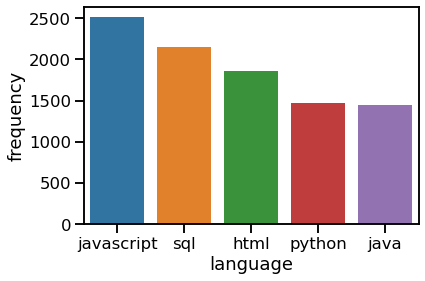

In [95]:
language_count=language_count[language_count['frequency']>1250]
sns.barplot(data=language_count, x='language', y='frequency')
#ver cambiar el ancho
#elijo solo los primeros 5 para una correcta visualizacion

In [96]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python",'javascript','sql','html','java']
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:10]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,sql,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
4,html,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,"[css, html, javascript, sql, typescript]"
4,javascript,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,"[css, html, javascript, sql, typescript]"


In [50]:
df['salary_monthly_NETO'].describe()

count    5.883000e+03
mean     9.490795e+04
std      9.686226e+04
min      1.000000e+00
25%      5.148000e+04
50%      7.800000e+04
75%      1.060000e+05
max      2.080000e+06
Name: salary_monthly_NETO, dtype: float64

In [51]:
df['salary_monthly_NETO'].isna().value_counts()

False    5883
True      212
Name: salary_monthly_NETO, dtype: int64

In [52]:
df_copy=df.copy()
df_copy['salary_monthly_NETO'].fillna(value = df_copy['salary_monthly_NETO'].mean(),inplace=True)
df_copy['salary_monthly_NETO'].isna().value_counts()
#relleno los valores nulos con la media de la columna

False    6095
Name: salary_monthly_NETO, dtype: int64

In [53]:
df_copy['salary_monthly_NETO'].quantile([.95,.98,.985,.999])

0.950     208444.0
0.980     360000.0
0.985     400000.0
0.999    1062616.0
Name: salary_monthly_NETO, dtype: float64

In [54]:

df_copy=df_copy[df_copy['salary_monthly_NETO']<400000]
df_copy['salary_monthly_NETO']
#elimino los valores por encima de 400.000 por conocimiento de dominio

0        43000.000
1        63000.000
2       127000.000
3       102000.000
4       106000.000
           ...    
6090     97000.000
6091     71000.000
6092        45.753
6093        72.000
6094     65000.000
Name: salary_monthly_NETO, Length: 5995, dtype: float64

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='Count'>

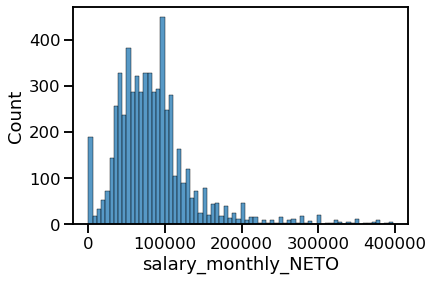

In [89]:
sns.histplot(data=df_copy, x='salary_monthly_NETO')

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='Count'>

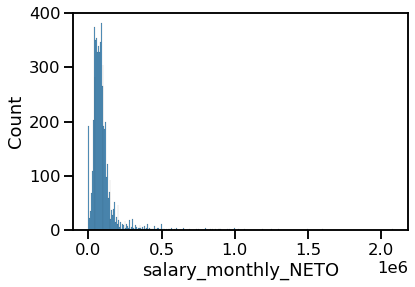

In [90]:
sns.histplot(data=df, x='salary_monthly_NETO')
#sin hacer el filtrado no podemos visualizar correctamente los salarios

voy a hacer el mismo procedimiento pero solo para los salarios que se encuentren dentro de los lenguajes filtrados

In [98]:
filtered_df_lang['salary_monthly_NETO'].isna().value_counts()

False    9112
True      344
Name: salary_monthly_NETO, dtype: int64

In [99]:
filtered_df_lang_copy=filtered_df_lang.copy()
filtered_df_lang_copy['salary_monthly_NETO'].fillna(value = filtered_df_lang_copy['salary_monthly_NETO'].mean(),inplace=True)
filtered_df_lang_copy['salary_monthly_NETO'].isna().value_counts()
#relleno los valores nulos con la media de la columna

False    9456
Name: salary_monthly_NETO, dtype: int64

In [100]:
filtered_df_lang_copy['salary_monthly_NETO'].quantile([.95,.98,.985,.999])

0.950     230000.0
0.980     369830.0
0.985     400000.0
0.999    1066000.0
Name: salary_monthly_NETO, dtype: float64

In [101]:
filtered_df_lang_copy=filtered_df_lang_copy[filtered_df_lang_copy['salary_monthly_NETO']<400000]
filtered_df_lang_copy['salary_monthly_NETO']
#elimino los valores por encima de 400.000 por conocimiento de dominio

1        63000.0
1        63000.0
1        63000.0
3       102000.0
3       102000.0
          ...   
6093        72.0
6093        72.0
6093        72.0
6093        72.0
6093        72.0
Name: salary_monthly_NETO, Length: 9304, dtype: float64

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='Count'>

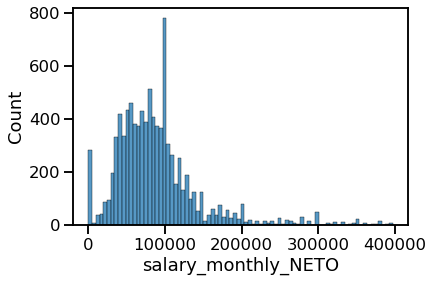

In [102]:
sns.histplot(data=filtered_df_lang_copy, x='salary_monthly_NETO')

In [113]:
group=filtered_df_lang_copy.groupby('programming_language')
group.median()

,salary_monthly_NETO
programming_language,
html,74700.0
java,88450.0
javascript,80000.0
python,90000.0
sql,78000.0


In [112]:
group.describe()
#analizadores de estadistica descriptiva

salary_monthly_NETO                                   \
                                   count          mean           std  min   
programming_language                                                        
html                              1831.0  83432.796683  56396.308187  1.0   
java                              1440.0  94614.491160  55882.084167  1.0   
javascript                        2465.0  90033.176911  60629.809277  1.0   
python                            1443.0  98470.658701  58984.709914  1.0   
sql                               2125.0  84980.165159  53162.714911  1.0   

                                                             
                          25%      50%        75%       max  
programming_language                                         
html                  50000.0  74700.0   99046.78  394375.0  
java                  58000.0  88450.0  115000.00  396000.0  
javascript            52290.0  80000.0  105000.00  397000.0  
python                62000.0  90000.0  115000.00  394375.0  
sql                   52000.0  78000.0  101000.00  396000.0

<AxesSubplot:xlabel='programming_language', ylabel='salary_monthly_NETO'>

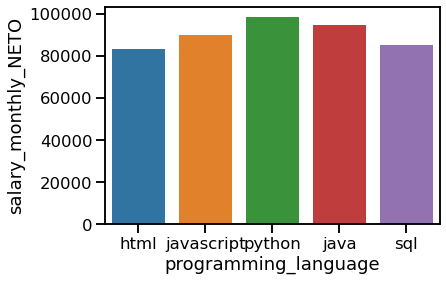

In [110]:
sns.barplot(data=filtered_df_lang_copy, x='programming_language', y='salary_monthly_NETO',ci=None)

<AxesSubplot:xlabel='programming_language', ylabel='salary_monthly_NETO'>

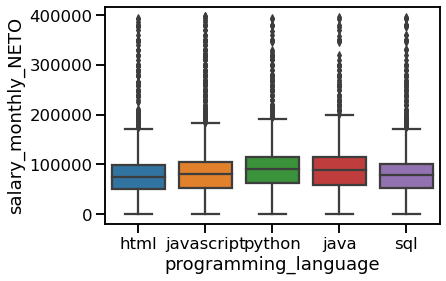

In [115]:
sns.boxplot(data=filtered_df_lang_copy, x='programming_language', y='salary_monthly_NETO')

<AxesSubplot:xlabel='programming_language', ylabel='salary_monthly_NETO'>

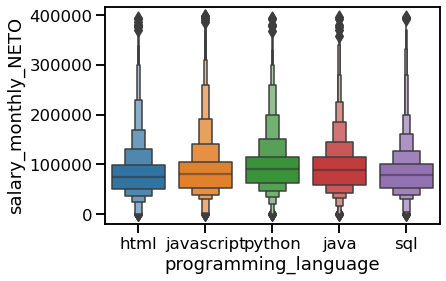

In [121]:
sns.boxenplot(data=filtered_df_lang_copy, x='programming_language', y='salary_monthly_NETO')